In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits
from scipy.stats import median_abs_deviation as MAD
from astropy.table import Table

In [2]:
import os
homedir=os.getenv("HOME")

In [3]:
w3_nopsf = Table.read(homedir+'/output_params_W3_nopsf.fits')
w3_psf = Table.read(homedir+'/output_params_W3_psf.fits')
w3_nopsf = w3_nopsf[(w3_nopsf['xc']>0)&(w3_psf['err_flag']==0)]
w3_psf = w3_psf[(w3_psf['xc']>0)&(w3_psf['err_flag']==0)]

In [91]:
d={
    "mult":'*',
    "add":'+',
    "subtr":'-'}

In [97]:
eval('5'+d['mult']+'5')

25

In [605]:
#https://cdsarc.cds.unistra.fr/viz-bin/cat/J/ApJS/245/25#/article

In [420]:
#sorts in ascending order according to one column's entries
re.sort('prefix')

In [596]:
#no psf case; marked galaxies with GALFIT error flags; allWISE (WXSC) vs. unWISE (me)
#can't easily compare radii; WXSC reports SMA. unsure whether SMA is full diameter and if it
#represents the SMA of the effective radius?

#use w3 magnitude instead. 
eff = re['R3']
my_eff = psf_params_v1['re']*2.75/60

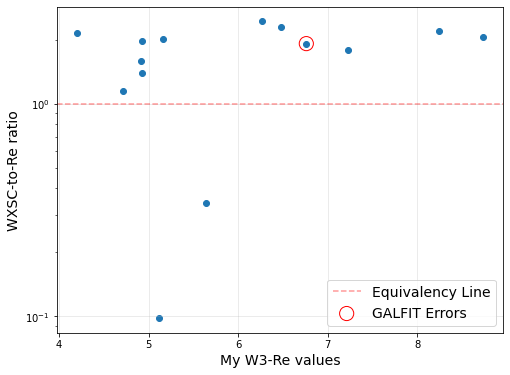

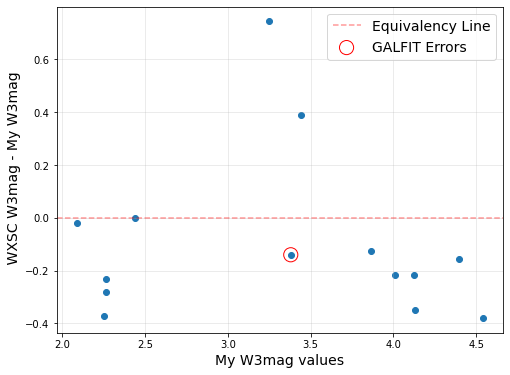

In [603]:
plt.figure(figsize=(8,6))

plt.scatter(eff,eff/my_eff/2)
plt.grid(alpha=0.3)
plt.xlabel('My W3-Re values',fontsize=14)
plt.ylabel('WXSC-to-Re ratio',fontsize=14)
plt.axhline(1,color='r',linestyle='dashed',alpha=0.4, label='Equivalency Line')

err = re_galfit['err_flag']==1
plt.scatter(eff[err],eff[err]/my_eff[err]/2,color='red',s=200,facecolor='None',label='GALFIT Errors')

#plt.ylim(0,40)
plt.yscale('log')
plt.legend(fontsize=14)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(re_galfit['mag'],re['W3mag']-re_galfit['mag'])
plt.grid(alpha=0.3)
plt.xlabel('My W3mag values',fontsize=14)
plt.ylabel(' WXSC W3mag - My W3mag',fontsize=14)
#plt.ylim(0,4)

plt.axhline(0,color='r',linestyle='dashed',alpha=0.4,label='Equivalency Line')

plt.scatter(re_galfit['mag'][err],re['W3mag'][err]-re_galfit['mag'][err],
            color='red',s=200,facecolor='None',label='GALFIT Errors')
plt.legend(fontsize=14)
plt.show()

In [ ]:
#psf_params_v1 --> website values
#re_galfit --> Rose's values
#re --> WXSC's values

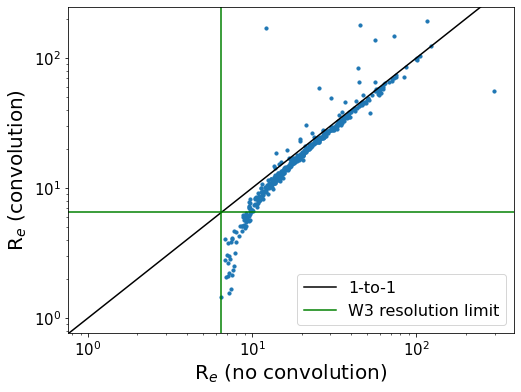

In [482]:
roseparams_nopsf=Table.read(homedir+'/vf_html/all_input_fits/output_params_W3_nopsf.fits')
roseparams_psf=Table.read(homedir+'/vf_html/all_input_fits/output_params_W3_psf.fits')

errflag = (roseparams_psf['re']>0) & (roseparams_psf['err_flag']==0) & (roseparams_psf['VFID']!='VFID1984')

plt.figure(figsize=(8,6))

plt.axline([0, 0], [1, 1], color='black',label='1-to-1')
plt.scatter(roseparams_nopsf['re'][errflag]*2.75,roseparams_psf['re'][errflag]*2.75,s=10)
#plt.axhline(2.232*2.75,color='red',alpha=0.3,label='PSF Size')
#plt.axvline(2.232*2.75,color='red',alpha=0.3)   #the 2.232 is the value of the PSF Re, in pixels.
plt.axvline(6.5,color='green',label='W3 resolution limit')
plt.axhline(6.5,color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'R$_e$ (no convolution)',fontsize=20)
plt.ylabel(r'R$_e$ (convolution)',fontsize=20)
plt.legend(fontsize=16)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig(homedir+'/Desktop/psf_demo_w3.png',dpi=100,bbox_inches='tight', pad_inches=0.2)

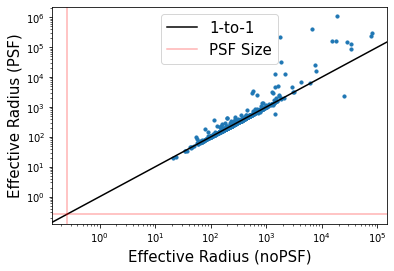

In [86]:
roseparams_nopsf=Table.read(homedir+'/vf_html/all_input_fits/output_params_r_nopsf.fits')
roseparams_psf=Table.read(homedir+'/vf_html/all_input_fits/output_params_r_psf.fits')

plt.axline([0, 0], [1, 1], color='black',label='1-to-1')
plt.scatter(roseparams_nopsf['re'][roseparams_psf['re']>0]*2.75,roseparams_psf['re'][roseparams_psf['re']>0]*2.75,s=10)
plt.axhline(0.262,color='red',alpha=0.3,label='PSF Size')
plt.axvline(0.262,color='red',alpha=0.3)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Effective Radius (noPSF)',fontsize=15)
plt.ylabel('Effective Radius (PSF)',fontsize=15)
plt.legend(fontsize=15)


plt.savefig(homedir+'/Desktop/psf_demo_r.png',dpi=250)

In [118]:
try:
    int('fit')
except ValueError:
    print('fit')

fit


In [127]:
one='/Users/k215c316/vf_html/all_input_fits/IC0540-custom-image-W3.fits'.split('/')
two=one[-1].split('-')
galaxy_name=two[0]
band=two[-1].split('.')[0]
print(galaxy_name,band)

IC0540 W3


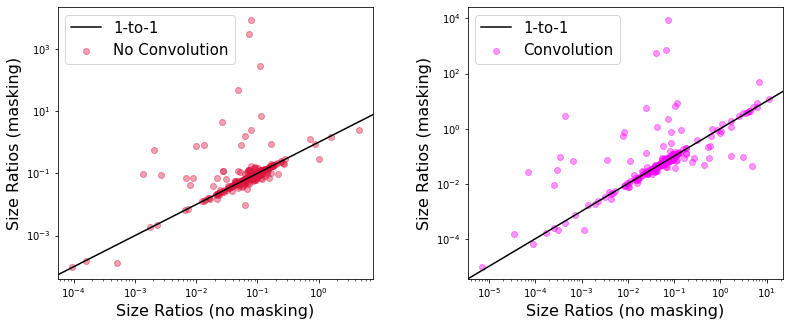

In [281]:
rats_noconv = [ratio_noconv_nomask,ratio_noconv_mask]
rats_conv = [ratio_conv_nomask,ratio_conv_mask]

fig = plt.figure(figsize=(13,5))
plt.subplots_adjust(wspace=.3)
        
for panel in range(2):
    ax = fig.add_subplot(1,2,panel+1)
    plt.axline([0, 0], [1, 1], color='black',label='1-to-1')
    if panel==0:
        plt.scatter(rats_noconv[0],rats_noconv[1], alpha=0.4, label='No Convolution',color='crimson')
    if panel==1:
        plt.scatter(rats_conv[0],rats_conv[1], alpha=0.4, label='Convolution',color='magenta')
    ax.set_xlabel('Size Ratios (no masking)',fontsize=16)
    ax.set_ylabel('Size Ratios (masking)',fontsize=16)
    ax.legend(fontsize=15)
    plt.xscale('log')
    plt.yscale('log')

plt.show()

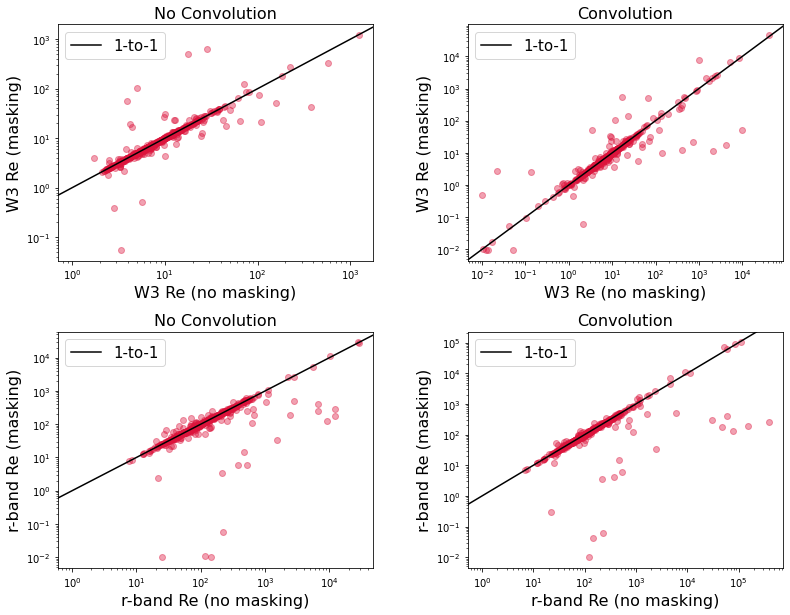

In [302]:
nomask_dat=[w3_noconv_nomask[group_flag],w3_conv_nomask[group_flag],r_noconv_nomask[group_flag],r_conv_nomask[group_flag]]
mask_dat=[w3_noconv_mask[group_flag],w3_conv_mask[group_flag],r_noconv_mask[group_flag],r_conv_mask[group_flag]]

xlabels=['W3 Re (no masking)','W3 Re (no masking)','r-band Re (no masking)','r-band Re (no masking)']
ylabels=['W3 Re (masking)','W3 Re (masking)','r-band Re (masking)','r-band Re (masking)']
titles=['No Convolution','Convolution','No Convolution','Convolution']

fig = plt.figure(figsize=(13,10))
plt.subplots_adjust(wspace=.3,hspace=.3)
for panel in range(4):
    ax = fig.add_subplot(2,2,panel+1)
    plt.axline([0, 0], [1, 1], color='black',label='1-to-1')
    plt.scatter(nomask_dat[panel]['re'], mask_dat[panel]['re'], alpha=0.4,color='crimson')
    ax.set_xlabel(xlabels[panel],fontsize=16)
    ax.set_ylabel(ylabels[panel],fontsize=16)
    ax.legend(fontsize=15)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(titles[panel],fontsize=16)
#plt.savefig(homedir+'/Desktop/masknomaskcomp.png',dpi=250)
plt.show()

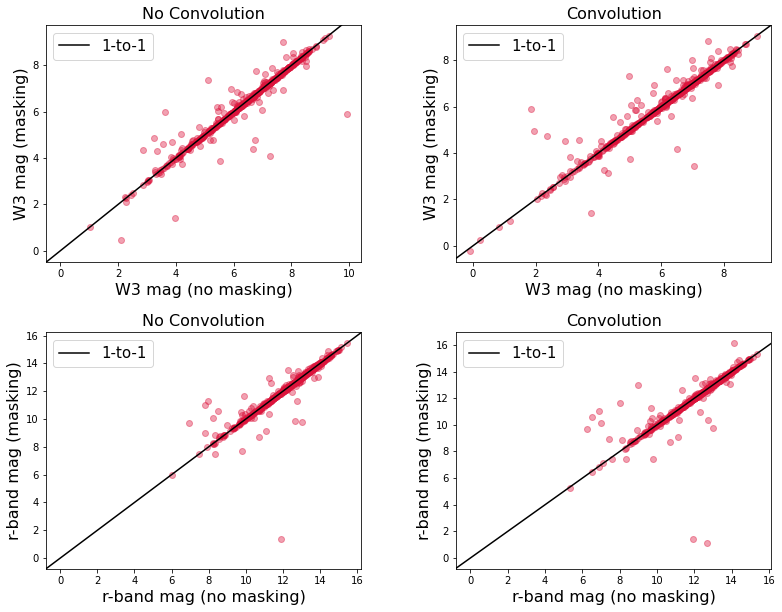

In [304]:
xlabels=['W3 mag (no masking)','W3 mag (no masking)','r-band mag (no masking)','r-band mag (no masking)']
ylabels=['W3 mag (masking)','W3 mag (masking)','r-band mag (masking)','r-band mag (masking)']
titles=['No Convolution','Convolution','No Convolution','Convolution']

fig = plt.figure(figsize=(13,10))
plt.subplots_adjust(wspace=.3,hspace=.3)
for panel in range(4):
    ax = fig.add_subplot(2,2,panel+1)
    plt.axline([0, 0], [1, 1], color='black',label='1-to-1')
    plt.scatter(nomask_dat[panel]['mag'], mask_dat[panel]['mag'], alpha=0.4,color='crimson')
    ax.set_xlabel(xlabels[panel],fontsize=16)
    ax.set_ylabel(ylabels[panel],fontsize=16)
    ax.legend(fontsize=15)
    #plt.xscale('log')
    #plt.yscale('log')
    plt.title(titles[panel],fontsize=16)
plt.savefig(homedir+'/Desktop/masknomaskcomp.png',dpi=250)
plt.show()

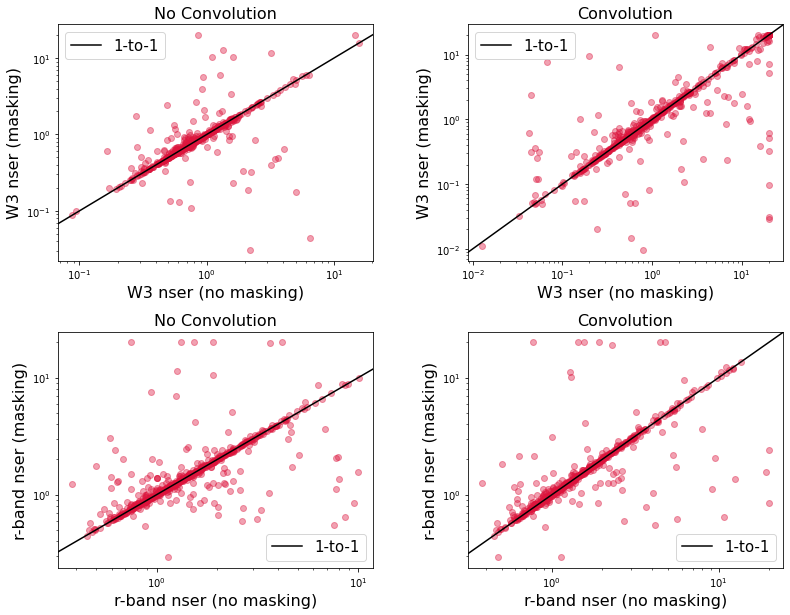

In [300]:
xlabels=['W3 nser (no masking)','W3 nser (no masking)','r-band nser (no masking)','r-band nser (no masking)']
ylabels=['W3 nser (masking)','W3 nser (masking)','r-band nser (masking)','r-band nser (masking)']
titles=['No Convolution','Convolution','No Convolution','Convolution']

fig = plt.figure(figsize=(13,10))
plt.subplots_adjust(wspace=.3,hspace=.3)
for panel in range(4):
    ax = fig.add_subplot(2,2,panel+1)
    plt.axline([0, 0], [1, 1], color='black',label='1-to-1')
    plt.scatter(nomask_dat[panel]['nsersic'], mask_dat[panel]['nsersic'], alpha=0.4,color='crimson')
    ax.set_xlabel(xlabels[panel],fontsize=16)
    ax.set_ylabel(ylabels[panel],fontsize=16)
    ax.legend(fontsize=15)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(titles[panel],fontsize=16)
#plt.savefig(homedir+'/Desktop/masknomaskcomp.png',dpi=250)
plt.show()

In [266]:
header_keywords=['1_XC','1_YC','1_MAG','1_RE','1_N','1_AR','1_PA','2_SKY','CHI2NU']

In [278]:
for hkey in header_keywords:
    try:
        s=str(header_test[hkey])
        if s.find('[')+1 > 0:
            s=s.replace('[','')
            s=s.replace(']','')
            values=(float(s),0.)
        else:
            s=s.split('+/-')
            values=(float(s[0]),float(s[1]))
    except IndexError:
            values=(float(s[0]))
    print(values)

(163.0002, 0.0023)
(162.9995, 0.0023)
(22.7508, 0.0012)
(2.0, 0.0)
(1.26, 0.0033)
(0.9994, 0.0016)
(26.5451, 109.0177)
(2.896e-07, 5.167e-10)
1.36064e-05


In [345]:
b = False if b!=True else True

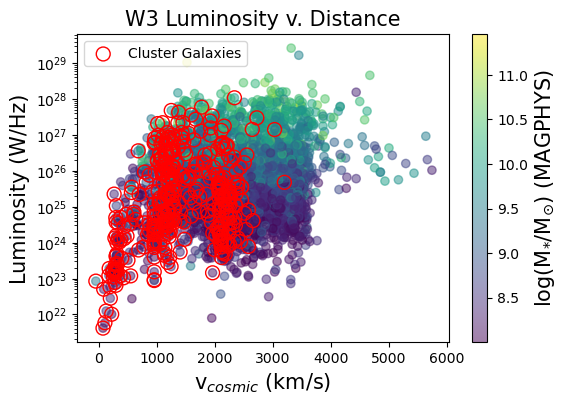

In [221]:
mass = Table.read(path_to_dir+'vf_v2_magphys_07-Jul-2022.fits')
phot=Table.read(path_to_dir+'vf_v2_legacy_ephot.fits')[(mass['logMstar']>8)&(mass['magphysFlag'])]['FLUX_AP02_W3']
mass_cut = mass[(mass['logMstar']>8)&(mass['magphysFlag'])]['logMstar']
clusflag = v2_env[(mass['logMstar']>8)&(mass['magphysFlag'])]['cluster_member']
mgs = Table.read(path_to_dir+'vf_v2_z0mgs.fits')[(mass['logMstar']>8)&(mass['magphysFlag'])]
vcosmic = Table.read(path_to_dir+'vf_v2_environment.fits')[(mass['logMstar']>8)&(mass['magphysFlag'])]['Vcosmic']

meters = (vcosmic/68)*3.08e22
flux = phot*1e-26  #W/m^2/Hz
lum = flux*(4*np.pi*meters**2)  #W/Hz

plt.figure(figsize=(6,4))
plt.scatter(vcosmic,lum,alpha=0.5,c=mass_cut,cmap='viridis')

plt.yscale('log')
plt.xlabel(r'v$_{cosmic}$ (km/s)',fontsize=15)
plt.ylabel('Luminosity (W/Hz)',fontsize=15)
plt.title('W3 Luminosity v. Distance',fontsize=15)
cb = plt.colorbar()
cb.set_label(label=r'log(M$_{*}$/M$_{\odot}$) (MAGPHYS)',size=15)
plt.scatter(vcosmic[clusflag],lum[clusflag],facecolor='None',edgecolor='red',s=100,label='Cluster Galaxies')

plt.legend(loc='upper left')
plt.show()

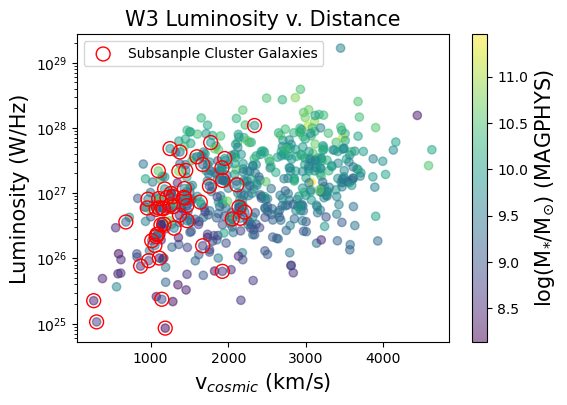

In [222]:
mass = Table.read(path_to_dir+'vf_v2_magphys_07-Jul-2022.fits')
phot=Table.read(path_to_dir+'vf_v2_legacy_ephot.fits')[(mass['logMstar']>8)&(mass['magphysFlag'])&(vf['sgacut_flag'])]['FLUX_AP02_W3']
mass_cut = mass[(mass['logMstar']>8)&(mass['magphysFlag'])&(vf['sgacut_flag'])]['logMstar']
clusflag = v2_env[(mass['logMstar']>8)&(mass['magphysFlag'])&(vf['sgacut_flag'])]['cluster_member']
mgs = Table.read(path_to_dir+'vf_v2_z0mgs.fits')[(mass['logMstar']>8)&(mass['magphysFlag'])&(vf['sgacut_flag'])]
vcosmic = Table.read(path_to_dir+'vf_v2_environment.fits')[(mass['logMstar']>8)&(mass['magphysFlag'])&(vf['sgacut_flag'])]['Vcosmic']

meters = (vcosmic/68)*3.08e22
flux = phot*1e-26  #W/m^2/Hz
lum = flux*(4*np.pi*meters**2)  #W/Hz

plt.figure(figsize=(6,4))
plt.scatter(vcosmic,lum,alpha=0.5,c=mass_cut,cmap='viridis')

plt.yscale('log')
plt.xlabel(r'v$_{cosmic}$ (km/s)',fontsize=15)
plt.ylabel('Luminosity (W/Hz)',fontsize=15)
plt.title('W3 Luminosity v. Distance',fontsize=15)
cb = plt.colorbar()
cb.set_label(label=r'log(M$_{*}$/M$_{\odot}$) (MAGPHYS)',size=15)
plt.scatter(vcosmic[clusflag],lum[clusflag],facecolor='None',edgecolor='red',s=100,label='Subsanple Cluster Galaxies')

plt.legend()
plt.show()

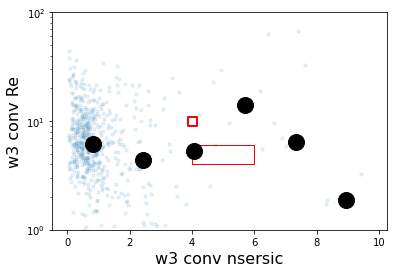

In [80]:
import random
from scipy.stats import binned_statistic
x=w3_conv['nsersic'][w3_conv['err_flag']<1]
y=w3_conv['re'][w3_conv['err_flag']<1]

bin_means, bin_edges, binnumber = binned_statistic(x,y,statistic='median', bins=6)
bin_centers = .5*(bin_edges[:-1]+bin_edges[1:])
plt.plot(bin_centers,bin_means,'ko',markersize=16)
plt.scatter(4,10,marker='s',s=80,linewidth=2,facecolor='none',edgecolor='red')
plt.scatter(x,y,alpha=0.1,s=10)

rectangle = plt.Rectangle((4,4), 2, 2, fc='none',ec="red")
plt.gca().add_patch(rectangle)

plt.yscale('log')
plt.xlabel('w3 conv nsersic',fontsize=16)
plt.ylabel('w3 conv Re',fontsize=16)
plt.ylim(1,1e2)
plt.show()

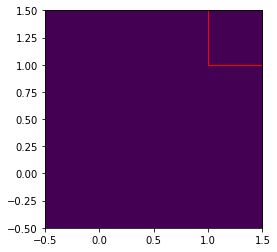

In [128]:
im=np.zeros((10,10))
plt.imshow(im,origin='lower')
rectangle = plt.Rectangle((1,1), 2, 2, fc='none',ec='red')
plt.gca().add_patch(rectangle)
plt.imshow(im[x:x+2,y:y+2],origin='lower')

In [121]:
test=np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15]])
#print(test)
print(test[1:4,1:4])

[[ 5  6  7]
 [ 9 10 11]
 [13 14 15]]


In [114]:
test

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [5]:
vf = Table.read(homedir+'/v2_snrcoadd.fits')
v2env = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_environment.fits')[vf['sgacut_flag']]
hyp = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_hyperleda.fits')[vf['sgacut_flag']]
z0mgs = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_z0mgs.fits')
z0mgs_cut = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_z0mgs.fits')[vf['sgacut_flag']]
magphys = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_magphys_07-Jul-2022.fits')[vf['sgacut_flag']]

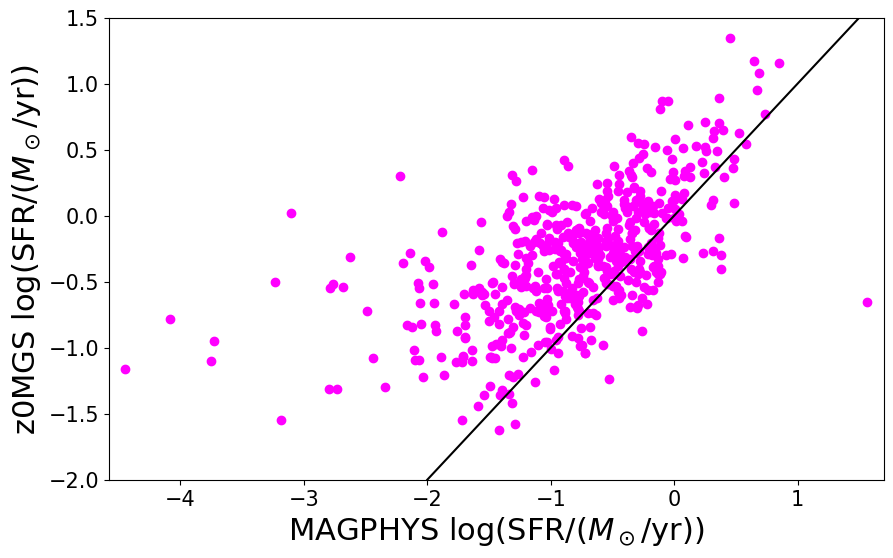

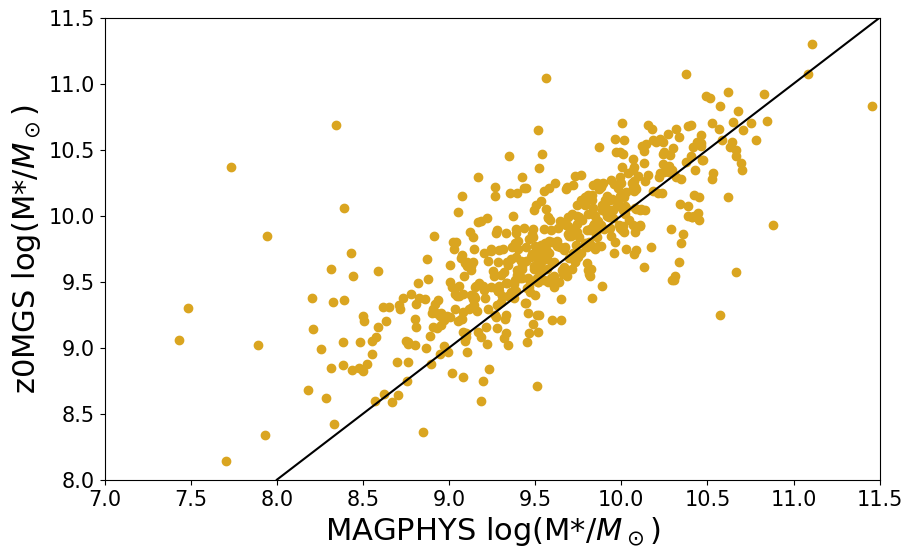

In [217]:
logsfr_magphys = magphys['logSFR'][(np.abs(magphys['logSFR'])>0) & (np.abs(magphys['logMstar'])>0)]
logmass_magphys = magphys['logMstar'][(np.abs(magphys['logSFR'])>0) & (np.abs(magphys['logMstar'])>0)]

logsfr_z0mgs = z0mgs_cut['logsfr'][(np.abs(magphys['logSFR'])>0) & (np.abs(magphys['logMstar'])>0)]
logmass_z0mgs = z0mgs_cut['logmass'][(np.abs(magphys['logSFR'])>0) & (np.abs(magphys['logMstar'])>0)]

plt.figure(figsize=(10,6))
plt.scatter(logsfr_magphys,logsfr_z0mgs,color='fuchsia')
plt.axline((0, 0), slope=1, label='1-to-1',color='black')
plt.ylabel(r'z0MGS log(SFR/($M_\odot$/yr))',fontsize=22)
plt.xlabel(r'MAGPHYS log(SFR/($M_\odot$/yr))',fontsize=22)
plt.ylim(-2,1.5)
plt.xlim(-4.58,1.7)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(homedir+'/Desktop/mstar_comp.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(logmass_magphys,logmass_z0mgs,color='goldenrod')
plt.axline((0, 0), slope=1, label='1-to-1',color='black')
plt.ylim(8,11.5)
plt.xlim(7,11.5)
plt.ylabel(r'z0MGS log(M*/$M_\odot$)',fontsize=22)
plt.xlabel(r'MAGPHYS log(M*/$M_\odot$)',fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(homedir+'/Desktop/sfr_comp.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()

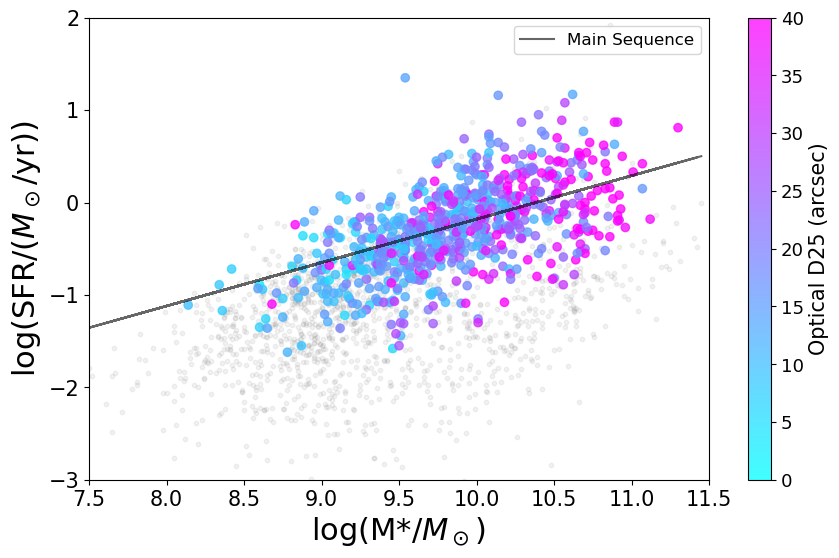

In [218]:
plt.figure(figsize=(10,6))
#plt.scatter(magphys['logMstar'],magphys['logSFR'],c=hyp['logd25'],cmap='cool')
plt.scatter(z0mgs['logmass'],z0mgs['logsfr'],color='gray',s=10,alpha=0.1)
plt.scatter(z0mgs_cut['logmass'],z0mgs_cut['logsfr'],c=10**hyp['logd25'],cmap='cool',alpha=0.75)

#add main sequence line
y = z0mgs['logmass']*0.47 - 4.88
plt.plot(z0mgs['logmass'],y,label=('Main Sequence'),color='black',alpha=0.6)

cb = plt.colorbar()
cb.set_label(label=r'Optical D25 (arcsec)',size=15)
plt.clim(0,40)

cb.ax.tick_params(labelsize=13)

plt.xlabel(r'log(M*/$M_\odot$)',fontsize=22)
plt.ylabel(r'log(SFR/($M_\odot$/yr))',fontsize=22)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=12)
plt.xlim(7.5,11.5)
plt.ylim(-3,2)

plt.savefig(homedir+'/Desktop/sfrmstar_z0mgs.png', dpi=300, bbox_inches='tight', pad_inches=0.2)

Text(0, 0.5, 'N gal Infall')

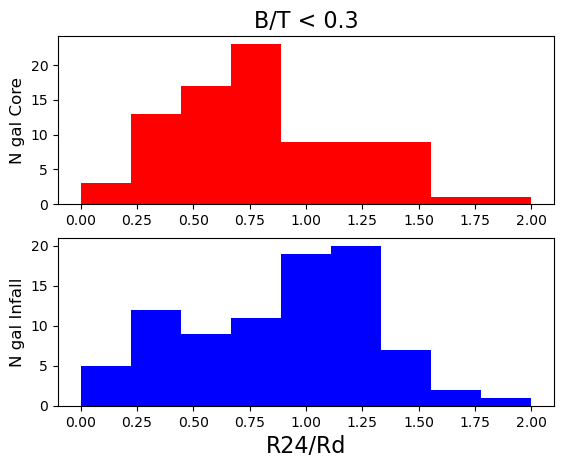

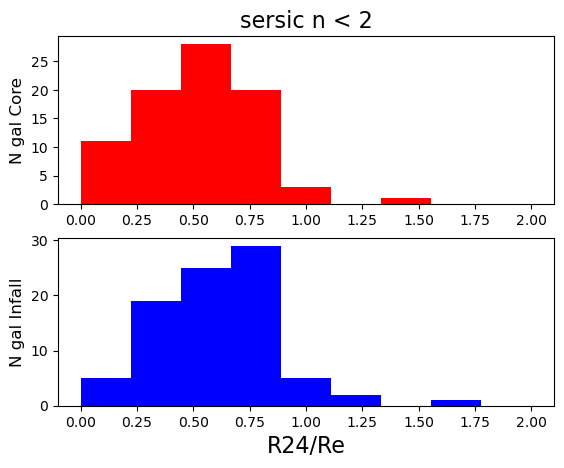

In [8]:
lcs = Table.read(homedir+'/Desktop/misc_cats/LCS_final_sample.fits')
test = lcs

plt.figure()
mybins = np.linspace(0,2,10)
plt.subplot(2,1,1)
flag = test['core'] & test['diskflag'] & (test['BT'] < 0.3)
plt.hist(test['sizeratio_disk'][flag],bins=mybins,color='r')
plt.ylabel('N gal Core',fontsize=12)
plt.title("B/T < 0.3",fontsize=16)
plt.subplot(2,1,2)
flag = test['infall'] & test['diskflag'] & (test['BT'] < 0.3)
plt.hist(test['sizeratio_disk'][flag],bins=mybins,color='b')
plt.xlabel('R24/Rd',fontsize=16)
plt.ylabel('N gal Infall',fontsize=12)

plt.figure()
mybins = np.linspace(0,2,10)
plt.subplot(2,1,1)
flag = test['core']  & (test['sersic_n'] < 2)
plt.hist(test['sizeratio_re'][flag],bins=mybins,color='r')
plt.ylabel('N gal Core',fontsize=12)
plt.title("sersic n < 2",fontsize=16)
plt.subplot(2,1,2)
flag = test['infall']  & (test['sersic_n'] < 2)
plt.hist(test['sizeratio_re'][flag],bins=mybins,color='b')
plt.xlabel('R24/Re',fontsize=16)
plt.ylabel('N gal Infall',fontsize=12)

#x1 = test['sizeratio_re'][test['core']  & (test['sersic_n'] < 6)]
#x2 = test['sizeratio_re'][test['infall']  & (test['sersic_n'] < 6)]
#lcscommon.ks(x1,x2,run_anderson=False)

In [9]:
lcs

NSAID,RA,DEC,logMstar,DV_SIGMA,DR_R200,core,infall,R24_arcsec,R24_kpc,Re_arcsec,Re_kpc,Rdisk_kpc,CLUSTER,sersic_n,BT,sizeratio_re,sizeratio_disk,diskflag
,,,,,,,,,,,,kpc,,,,,,
int32,float32,float32,float32,float32,float32,bool,bool,float32,float64,float32,float64,float32,bytes8,float32,float64,float32,float64,bool
70588,201.66895,11.748666,9.720892,12.755887,1.5570214,False,False,1.5153251,1.1817471925203087,2.0254278,1.5795578692767944,1.08,MKW11,1.7714064,0.30000001192092896,0.7481506,1.0942103199647186,True
70609,202.75081,11.488522,10.070082,10.9922695,1.0429101,False,False,5.40029,3.979128679568729,7.167247,5.28108625720802,3.8,MKW11,0.8631493,0.07000000029802322,0.75346786,1.0471391393421616,True
70611,202.66698,11.5949,10.341595,0.853624,0.7569792,True,False,4.613595,2.1502177893886527,11.402006,5.314033071801218,3.58,MKW11,1.1604208,0.1599999964237213,0.40463012,0.6006195070425375,True
70615,202.48636,11.072101,10.132627,0.36092398,1.5836535,False,True,10.223115,4.6375480099975155,16.296457,7.39261989321825,4.59,MKW11,1.6338267,0.07999999821186066,0.6273213,1.010359009984524,True
70626,202.3787,11.745819,11.276411,0.8731935,0.09359614,True,False,7.366905,3.4334289442530888,15.3116665,7.1361741994951915,--,MKW11,6.0,--,0.4811302,3.4334289442530888,True
70630,202.30682,11.275839,11.077428,0.8425911,1.1324185,False,True,2.08446,0.9201725418495218,27.00403,11.920769357806991,--,MKW11,5.3919725,--,0.0771907,0.9201725418495218,True
70635,202.31174,11.599927,9.652148,0.5032038,0.43867907,True,False,1.63415,0.7616139809599867,4.011274,1.8694992510914248,1.09,MKW11,1.354182,0.03999999910593033,0.40738928,0.698728401502211,True
70639,202.22575,11.643008,11.028671,14.759641,0.46374387,False,False,3.62061,2.999976825277366,159.75781,132.3726486223851,2.28,MKW11,0.5,0.0,0.022663116,1.3157793258430328,True


In [ ]:
sga_params=Table.read(homedir+'/sgacut_SGAparams.fits')

In [ ]:
sga_params.sort('VFID_1')

In [1173]:
r0 = 10 #arcsec
alpha_1 = sga_params['R_COG_PARAMS_ALPHA1']
alpha_2 = sga_params['R_COG_PARAMS_ALPHA2']
m0 = sga_params['R_COG_PARAMS_M0']

comp_one = np.log10(0.5)/(0.4*m0)
comp_two = np.exp(-comp_one) - 1
comp_three = (1/alpha_1) * comp_two
comp_four = comp_three**(-1/alpha_2)

r50_tentative = r0 * comp_four

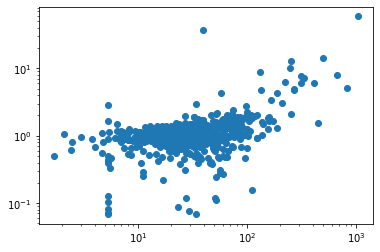

In [1169]:
rconv_flag = (r_conv['re']>0) & (r_conv['err_flag']!=1)
plt.scatter(sga_params['r50 (rband)'][rconv_flag],sga_params['r50 (rband)'][rconv_flag]/(r_conv['re'][rconv_flag]*0.262))
plt.xscale('log')
plt.yscale('log')

In [217]:
from itertools import combinations
env_names = ['cluster','rich group','poor group','filament','field']
print(list(combinations(env_names,2)))

[('cluster', 'rich group'), ('cluster', 'poor group'), ('cluster', 'filament'), ('cluster', 'field'), ('rich group', 'poor group'), ('rich group', 'filament'), ('rich group', 'field'), ('poor group', 'filament'), ('poor group', 'field'), ('filament', 'field')]


In [33]:
test_list = [0,1,2,3,3]
test_array = np.array([0,1,2,3,4])
test_array2 = np.array([0,1,2,3,5])

In [39]:
np.ndarray.tolist(np.concatenate([test_list,test_array,test_array2]))

[0, 1, 2, 3, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 5]

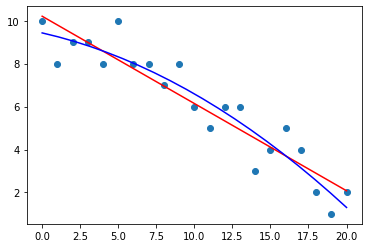

In [145]:
x1=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
y1=np.array([10,8,9,9,8,10,8,8,7,8,6,5,6,6,3,4,5,4,2,1,2])
plt.scatter(x1,y1)
p1 = np.poly1d(np.polyfit(x1,y1,1))
p2 = np.poly1d(np.polyfit(x1,y1,2))

x_p = np.linspace(0,20,20)

plt.plot(x_p,p1(x_p),color='red')
plt.plot(x_p,p2(x_p),color='blue')

plt.show()

In [146]:
p1

poly1d([-0.40649351, 10.20779221])

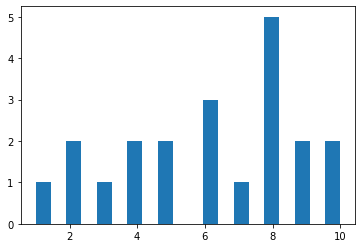

In [163]:
counts,b,c=plt.hist(y1,bins=20)
#counts=counts[0]
xcenters = (b[:-1] + b[1:]) / 2

In [347]:
ttype_dict ={'Sa':1,'Sab':2,'Sb':3,'Sbc':4,'Sc':5,'Scd':6,'Sd':7,'Sdm':8,'Sm':9,'Ir':10}
#hyp['t']

In [488]:
ab = [[1,2,3],[3,4,5],[5,6,7],[7,8,9]]
np.concatenate([ab[0],ab[1],ab[2],ab[3]])

array([1, 2, 3, 3, 4, 5, 5, 6, 7, 7, 8, 9])

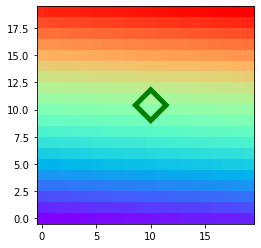

In [563]:
from matplotlib.patches import Rectangle

X = np.arange(400).reshape(20, 20)

rect = Rectangle((10, 9),2, 2,fc ='none', ec ='g',lw = 5, angle=45)

fig = plt.figure()
  
ax = fig.add_subplot(111)
ax.imshow(X,'rainbow',interpolation ='nearest',origin='lower')
ax.add_patch(rect)

In [522]:
rect.get_angle()

45.0

In [564]:
rect.get_path()

Path(array([[0., 0.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [0., 0.]]), array([ 1,  2,  2,  2, 79], dtype=uint8))

In [ ]:
#generating explicit flags for t-type, S/N, and logmass
#I require Hyperleda, v2main, and the MAGPHYS tables loaded
v2main = Table.read(homedir+'/v2_snrcoadd.fits')
hyp = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_hyperleda.fits')
magphys = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_magphys_07-Jul-2022.fits')
t_type = hyp['t']
logmass = magphys['logMstar']
magphysFlag = magphys['magphysFlag']

In [ ]:
sfr=magphys['logSFR']
sfrflag=(sfr>-1.96).data

In [18]:
v2main.add_column(sfrflag,name='SFRflag')

In [21]:
subsample_flag = (v2main['sgacut_flag']) & (v2main['massflag']) & (v2main['SNRflag']) & (v2main['t_flag']) & (v2main['sSFR_flag']) & (v2main['SFRflag'])

In [726]:
tflag = (t_type>=0)
SNRflag = (v2main['snr15_flag']) | (v2main['snr30_flag'])
massflag = (logmass>8) & (magphysFlag)


In [10]:
#v2main.add_column(subsample_flag,name='subsample_flag')

In [11]:
#v2main.write(homedir+'/v2_snrcoadd.fits',overwrite=True)

In [24]:
print(len(v2main[v2main['sgacut_flag']]))
print(len(v2main[v2main['subsample_flag']]))

702
496


In [2]:
from astropy.cosmology import WMAP9 as cosmo

In [5]:
cosmo.arcsec_per_kpc_proper([0.002,0.01]).value

array([23.90493418,  4.82748712])

In [27]:
#kpc
vr = v2_envcut['Vcosmic']
c=3e5
z = vr/c

In [30]:
def func(I_0,n,r_e,r):
    return np.log10(I_0) - np.log10(np.e)/(r_e**(1/n))*r**(1/n)

In [6]:
vf=Table.read(homedir+'/v2_snrcoadd.fits')
w1 = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_galfit_W1.fits')[vf['subsample_flag']]
magphys = Table.read(homedir+'/Desktop/v2-20220820/vf_v2_magphys_07-Jul-2022.fits')[vf['subsample_flag']]
vf=vf[vf['subsample_flag']]
w3 = Table.read(homedir+'/output_params_W3_psf.fits')
rband = Table.read(homedir+'/output_params_r_psf.fits')

In [9]:
w3_bool = []
for vfid in w3['VFID']:
    w3_bool.append(True) if vfid in vf['VFID'] else w3_bool.append(False)
w3 = w3[w3_bool]
rband = rband[w3_bool]

flags = (w1['CRE']!=0) & (rband['re']!=0) & (w1['CERROR']!=1) & (rband['err_flag']!=1) & (rband['nsersic']<6) & (w1['CN']<6) & (magphys['magphysFlag'])

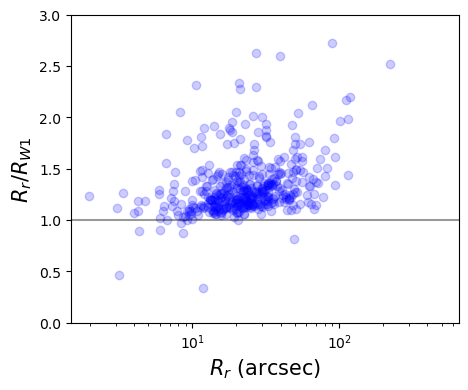

In [10]:
plt.figure(figsize=(5,4))
plt.scatter(rband['re'][flags]*0.262,rband['re'][flags]*0.262/(w1['CRE'][flags]*2.75),
           alpha=0.2,color='blue')
plt.axhline(1,color='black',alpha=0.4)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$R_r$ (arcsec)',fontsize=15)
plt.ylabel(r'$R_r/R_{W1}$',fontsize=15)
plt.ylim(0,3)
plt.show()

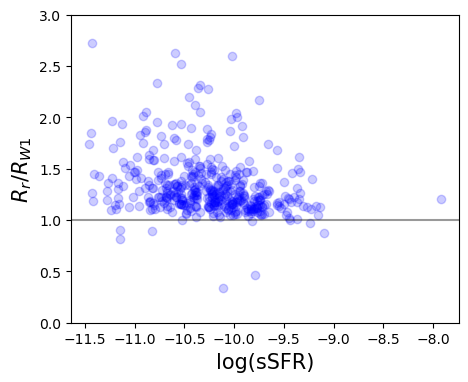

In [14]:
plt.figure(figsize=(5,4))
plt.scatter(magphys['logSFR'][flags]-magphys['logMstar'][flags],
            rband['re'][flags]*0.262/(w1['CRE'][flags]*2.75),
           alpha=0.2,color='blue')
plt.axhline(1,color='black',alpha=0.4)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'log(sSFR)',fontsize=15)
plt.ylabel(r'$R_r/R_{W1}$',fontsize=15)
plt.ylim(0,3)
plt.show()

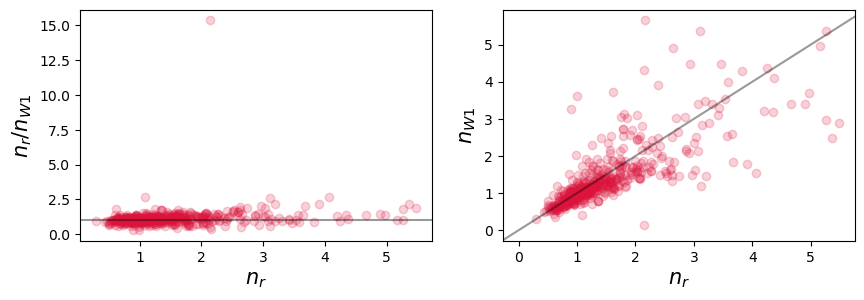

In [150]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.scatter(rband['nsersic'][flags],rband['nsersic'][flags]/(w1['CN'][flags]),
           alpha=0.2,color='crimson')
plt.axhline(1,color='black',alpha=0.4)
#plt.ylim(-0.01,3)
plt.xlabel(r'$n_r$',fontsize=15)
plt.ylabel(r'$n_r/n_{W1}$',fontsize=15)
plt.subplot(1,2,2)
plt.scatter(rband['nsersic'][flags],(w1['CN'][flags]),
           alpha=0.2,color='crimson')
plt.axline([0,0],slope=1,color='black',alpha=0.4)
plt.xlabel(r'$n_r$',fontsize=15)
plt.ylabel(r'$n_{W1}$',fontsize=15)
plt.show()